### Erupean Social Survey

#### Challange: What to use?

Using selected questions from the 2012 and 2014 editions of the European Social Survey,I have tried to solve the following questions.But before delving direct in to the questions let me introduce you to the underlying dataset's properties and settings.The data was collected through survey for two different years i.e 2012 and 2014.Data was entered in to a system based on the codes assigned during questionier.The codes for the two years for instance are 6 and 7 respectively.For more details and ease of understanding I have included in my github account the codebook along side my work and raw dataset.First things first lets import the python libraries that will do the job. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ess_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
ess_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In the above question, we are required to use three variables in the dataset.'Year' and 'ppltrst' and 'cntry'.Lets first explore the variables before jumping in to our analysis.

In [4]:
ess_data['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

There are 6 distinct countries in this study.But 'DE' which refers to denimark has a very few number of observations i.e 28.We will get back to this imbalance later as required to be addressed in our analysis.Lets move on with our practice of exploration.

In [5]:
ess_data['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

We have equal number of observations for the two distinct years in our data.

lastly;

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


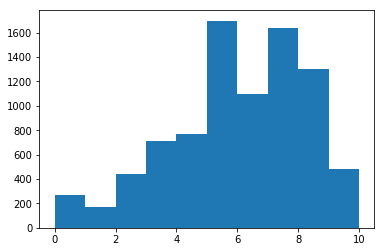

In [6]:
plt.hist(ess_data['ppltrst']);

from the visualization stand point, the overall data for both the years combined together seems normaly distributed with little skewness to words the right which averages around 7.5, which is an indication that the answers were in favour of 'Most people can be trusted'.But our main question on the above was, can we identify any difference of people on the level of trust in the two different years(i.e 2012 and 2014).We want to check that in each of the six countries using visual perseption and statistical measures.But which statistical measures to use depends on the normality of the distribution. 

In [7]:
# There are only 14 nan values in the ppltrst column.
len(ess_data[ess_data['ppltrst'].isnull()])

14

In [8]:
k2, p = stats.normaltest(ess_data['ppltrst'], nan_policy='omit')

In [9]:
# null hypothesis: x comes from a normal distribution
print("p = {}".format(p))

p = 3.174024854037719e-73


We reject our null hypothesis and conclude that the ppltrst is not normaly distributed.Therefore we should depend on non-parametric tests and visual perception to conclude our findings.

For the five countries other than Denimark the size of the sample was enough for analysis,but with Denimark it looks like we may not have enough data to make a sounding findings.For both years we saw that there were only 28 observations,lets find out if there were 14 observations for each year for Denimark.

In [10]:
#for 2012 and Denimark
len(ess_data[(ess_data['year'] == 6) & (ess_data['cntry'] == 'DE')])

14

Yes we have confirmed that we only have 14 observations for each year in our analysis for Denimark.Its too few number of observations.But for the other countries the number of sample observations are sufficient for analysis.

In [11]:
# subdata for the years 2012 and 2014
data_2012 = ess_data[ess_data['year'] == 6]
data_2014 = ess_data[ess_data['year'] == 7]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


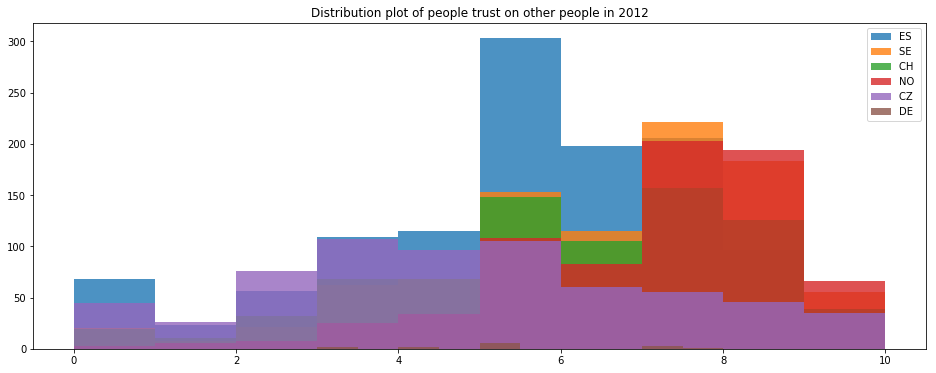

In [12]:
# histogram for each country for the year 2012 
# 3 plt.figure(figsize = (16, 6)
p_array = []
plt.figure(figsize = (16, 6))
for country in ess_data['cntry'].value_counts().index:
    plt.hist(data_2012[data_2012['cntry'] == country]['ppltrst'], label="{} ".format(country), alpha = 0.8);
    k2, p = stats.normaltest(data_2012[data_2012['cntry'] == country]['ppltrst'], nan_policy='omit')
    p_array.append(p)
plt.title('Distribution plot of people trust on other people in 2012')    
plt.legend();       

In [13]:
print(p_array)

[3.7233182008430934e-11, 1.6891340175735596e-16, 3.365792056559453e-08, 2.7345537691839186e-19, 3.6357853778444874e-06, 0.7581671476973477]


The results on the above p-values are telling us that except for Denmark for all other countries ppltrst is not normal.

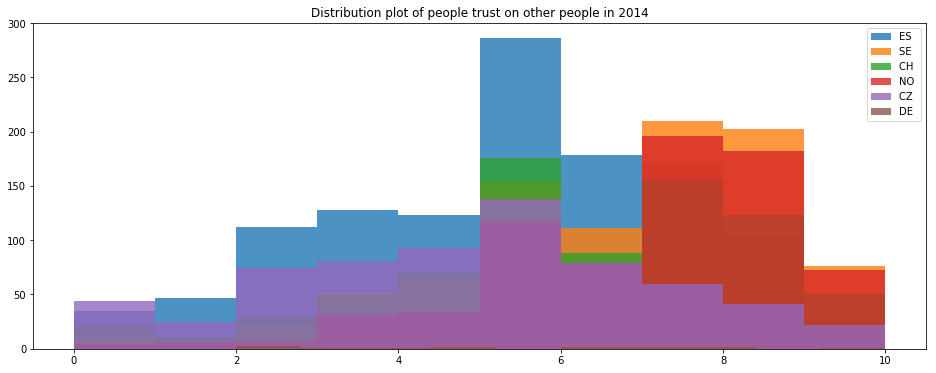

In [14]:
# histogram for each country for the year 2014
# 3 plt.figure(figsize = (16, 6)
plt.figure(figsize = (16, 6))
for country in ess_data['cntry'].value_counts().index:
    plt.hist(data_2014[data_2014['cntry'] == country]['ppltrst'], label="{} ".format(country), alpha = 0.8);
plt.title('Distribution plot of people trust on other people in 2014')    
plt.legend();       

The countries in our sample are 'ES'= Estonia, 'SE'= Sweden, 'CH'= Switzerland, 'NO'= Norway and 'CZ'= Czech Republic.

Based on our visualization from the above two distribution plots we can identify patterns and can be presented as follows;

The level of people mistrust(between 2 - 4) seems to have increased in Estonia from 2012 to 2014;The blue histograms() has emerged to rise above the other histograms and more importantly above the blue histograms in 2012.And additionaly the level of trust beyond 5 seems to have decreased as well which indicates a significant change in the level of trust.Even if applying further paired-test can ensure our findings, But based on the visualization on the above estonians' people's trust has decreased.Or we may support our visual assumptions by furthering our analysis using Kruskal-Wallace non-parametric tests.

The same concept can be applied with the other countries and lets go ahead interpret the findings from a visual interpretation stand point. 

Sweden is represented by the orange colored histogram,Swizerland by the green,Norway by the red,Czek Republic pink and Denimark by brown.And it shows that there was not significant difference in the level of trust between the two years in almost all the countries except Estonia.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

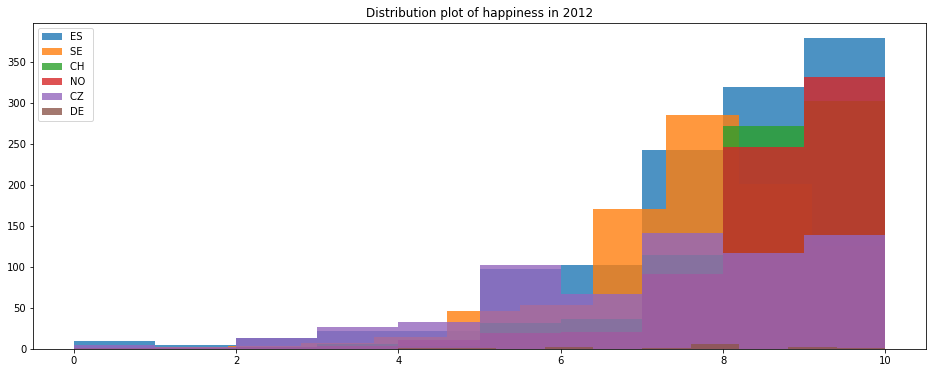

In [15]:
plt.figure(figsize = (16, 6))
for country in ess_data['cntry'].value_counts().index:
    plt.hist(data_2012[data_2012['cntry'] == country]['happy'], label="{} ".format(country), alpha = 0.8);
plt.title('Distribution plot of happiness in 2012')    
plt.legend();       

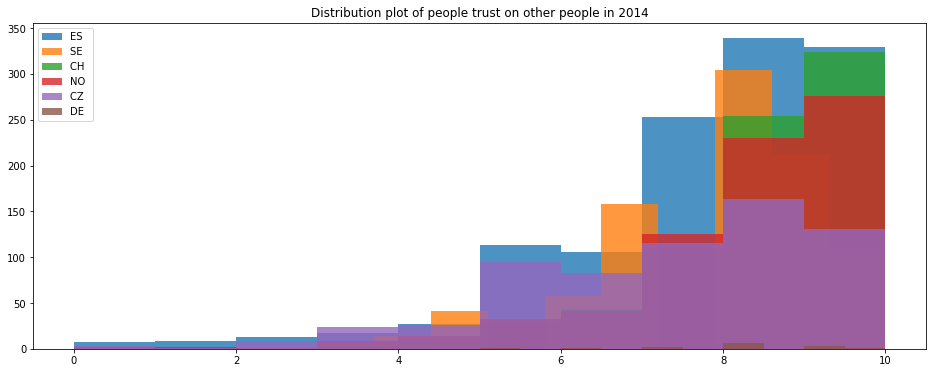

In [16]:
# histogram for each country for the year 2014
# 3 plt.figure(figsize = (16, 6)
plt.figure(figsize = (16, 6))
for country in ess_data['cntry'].value_counts().index:
    plt.hist(data_2014[data_2014['cntry'] == country]['happy'], label="{} ".format(country), alpha = 0.8);
plt.title('Distribution plot of people trust on other people in 2014')    
plt.legend();       

Based on the visualization on the above we can understand that happiness is skewed to words the wonderfull right side on both years.It looks like there is a slight difference on the different colors(representing the different countries).Lets use Kruskal-Wallace Test to check if there was any difference in the happiness level in the 6 countries between the two years.

In [17]:
for country in ess_data['cntry'].value_counts().index:
    p = stats.kruskal(ess_data[(ess_data['cntry'] == country) & (ess_data['year'] == 6)]['happy'],ess_data[(ess_data['cntry'] == country) & (ess_data['year'] == 7)]['happy'], nan_policy='omit')
    p_array.append('country: {}, {}'.format(country, p))

In [18]:
print(p_array)

[3.7233182008430934e-11, 1.6891340175735596e-16, 3.365792056559453e-08, 2.7345537691839186e-19, 3.6357853778444874e-06, 0.7581671476973477, 'country: ES, KruskalResult(statistic=4.089203641177268, pvalue=0.04315797189625085)', 'country: SE, KruskalResult(statistic=0.05045734520052835, pvalue=0.8222693615371405)', 'country: CH, KruskalResult(statistic=0.22331955287588717, pvalue=0.6365221432042547)', 'country: NO, KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)', 'country: CZ, KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800354)', 'country: DE, KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)']


Based on our Kruskal test findings Norway people's happiness significantly decreased in 2014,But all the other countries people's happiness level was not significantly changed.